<a href="https://colab.research.google.com/github/deekshaaj05/1RV23BT001---Bioinformatics-Lab/blob/main/1RV23BT001_Exp_7_Genome_Assembly_of_Sweet_Potato_Chloroplast_Genome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y spades

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  bamtools bwa libbamtools2.5.1 libhat-trie0 libhts3 libhtscodecs2 libnlopt0
  libssw0 python3-attr python3-iniconfig python3-joblib python3-numpy
  python3-packaging python3-pluggy python3-psutil python3-py python3-pygments
  python3-pytest python3-simplejson python3-toml python3-yaml samtools
Suggested packages:
  python-attr-doc python-numpy-doc python3-dev python-psutil-doc subversion
  python-pygments-doc ttf-bitstream-vera cwltool
The following NEW packages will be installed:
  bamtools bwa libbamtools2.5.1 libhat-trie0 libhts3 libhtscodecs2 libnlopt0
  libssw0 python3-attr python3-iniconfig python3-joblib python3-numpy
  python3-packaging python3-pluggy python3-psutil python3-py python3-pygments
  python3-pytest python3-simplejson python3-toml python3-yaml samtools spades
0 upgraded, 23 newly installed, 0 to remove and 1 not upgrad

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.5 MB/s eta 0:00:00


In [ ]:
import requests
import os

zenodo_url = 'https://zenodo.org/records/3567224/files/sweet-potato-chloroplast-illumina-reduced.fastq?download=1'
output_filename = 'sweet-potato-chloroplast-illumina-reduced.fastq'

print(f"Attempting to download file from: {zenodo_url}")

try:
    # Make an HTTP GET request to download the file content
    response = requests.get(zenodo_url, stream=True)
    response.raise_for_status() # Raise an exception for HTTP errors (4xx or 5xx)

    # Open a local file in binary write mode ('wb') to save the downloaded content
    with open(output_filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    print(f"Successfully downloaded '{output_filename}'")

    # Verify the file download by checking if the file exists and its size (optional)
    if os.path.exists(output_filename):
        file_size = os.path.getsize(output_filename) / (1024 * 1024) # Size in MB
        print(f"File '{output_filename}' size: {file_size:.2f} MB")
    else:
        print(f"Error: '{output_filename}' was not created.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Attempting to download file from: https://zenodo.org/records/3567224/files/sweet-potato-chloroplast-illumina-reduced.fastq?download=1
Successfully downloaded 'sweet-potato-chloroplast-illumina-reduced.fastq'
File 'sweet-potato-chloroplast-illumina-reduced.fastq' size: 16.81 MB


In [ ]:
import subprocess
import os

# Define input FASTQ file and output directory
input_fastq = 'sweet-potato-chloroplast-illumina-reduced.fastq'
output_directory = 'spades_chloroplast_output'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Created output directory: '{output_directory}'")

# Construct the SPAdes command
# For this small placeholder file, a simple command is sufficient.
# In a real scenario, you might add options like --careful, --only-assembler, etc.
# spades.py is typically the entry point for running SPAdes.
command = [
    'spades.py',
    '--careful',
    '--only-assembler',
    '--s1', input_fastq, # '--s1' for single-end reads
    '-o', output_directory
]

print(f"Executing SPAdes command: {' '.join(command)}")

try:
    # Execute the SPAdes command
    # capture_output=True captures stdout and stderr
    # text=True decodes stdout/stderr as text
    # check=True raises CalledProcessError for non-zero exit codes
    result = subprocess.run(command, capture_output=True, text=True, check=True)

    print("SPAdes execution completed (illustrative).")
    print(f"Output would be found in the directory: '{output_directory}'")
    print("\n--- SPAdes Standard Output ---")
    print(result.stdout)
    print("\n--- SPAdes Standard Error ---")
    print(result.stderr)

except subprocess.CalledProcessError as e:
    print(f"Error during SPAdes execution: {e}")
    print("\n--- SPAdes Standard Output (Error) ---")
    print(e.stdout)
    print("\n--- SPAdes Standard Error (Error) ---")
    print(e.stderr)
except FileNotFoundError:
    print("Error: spades.py command not found. Make sure SPAdes is correctly installed and in your PATH.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Created output directory: 'spades_chloroplast_output'
Executing SPAdes command: spades.py --careful --only-assembler --s1 sweet-potato-chloroplast-illumina-reduced.fastq -o spades_chloroplast_output
SPAdes execution completed (illustrative).
Output would be found in the directory: 'spades_chloroplast_output'

--- SPAdes Standard Output ---
Command line: /usr/lib/spades/bin/spades.py	--careful	--only-assembler	--s1	/content/sweet-potato-chloroplast-illumina-reduced.fastq	-o	/content/spades_chloroplast_output	

System information:
  SPAdes version: 3.13.1
  Python version: 3.12.12
  OS: Linux-6.6.105+-x86_64-with-glibc2.35

Output dir: /content/spades_chloroplast_output
Mode: ONLY assembling (without read error correction)
Debug mode is turned OFF

Dataset parameters:
  Multi-cell mode (you should set '--sc' flag if input data was obtained with MDA (single-cell) technology or --meta flag if processing metagenomic dataset)
  Reads:
    Library number: 1, library type: single
      left re

In [ ]:
print(f"Contents of '{output_directory}':")
if os.path.exists(output_directory):
    for root, dirs, files in os.walk(output_directory):
        level = root.replace(output_directory, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f'{subindent}{f}')
else:
    print(f"Directory '{output_directory}' does not exist.")

Contents of 'spades_chloroplast_output':
spades_chloroplast_output/
    contigs.paths
    scaffolds.fasta
    params.txt
    spades.log
    assembly_graph_with_scaffolds.gfa
    scaffolds.paths
    input_dataset.yaml
    assembly_graph.fastg
    dataset.info
    before_rr.fasta
    contigs.fasta
    K21/
        simplified_contigs.fasta
        final.lib_data
        configs/
            plasmid_mode.info
            pe_params.info
            careful_mode.info
            meta_mode.info
            simplification.info
            detail_info_printer.info
            distance_estimation.info
            config.info
            construction.info
            mda_mode.info
            moleculo_mode.info
            careful_mda_mode.info
            rna_mode.info
            large_genome_mode.info
            tsa.info
            toy.info
    mismatch_corrector/
        scaffolds/
            corrected_contigs.fasta
            configs/
                corrector.info
        contigs/
     

Assembly Metrics
----------------
Number of contigs      : 10
Total assembly length  : 130906 bp
Largest contig length  : 87615 bp


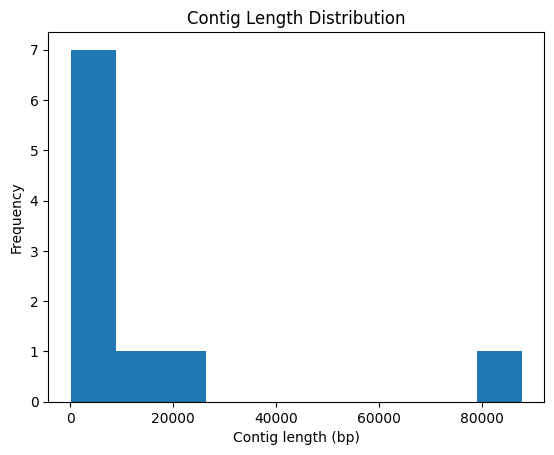

In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt

# Path to SPAdes contigs file
contigs_fasta = "spades_chloroplast_output/contigs.fasta"

# Read contigs and calculate lengths
contig_lengths = [len(record.seq) for record in SeqIO.parse(contigs_fasta, "fasta")]

# Assembly metrics
contig_count = len(contig_lengths)
total_length = sum(contig_lengths)
max_contig = max(contig_lengths)

# Print metrics
print("Assembly Metrics")
print("----------------")
print(f"Number of contigs      : {contig_count}")
print(f"Total assembly length  : {total_length} bp")
print(f"Largest contig length  : {max_contig} bp")

# Plot length distribution
plt.figure()
plt.hist(contig_lengths, bins=10)
plt.xlabel("Contig length (bp)")
plt.ylabel("Frequency")
plt.title("Contig Length Distribution")
plt.show()